In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
world_happiness=pd.read_csv('world_happiness.csv')

In [3]:
world_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
world_happiness.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
world_happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
world_happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

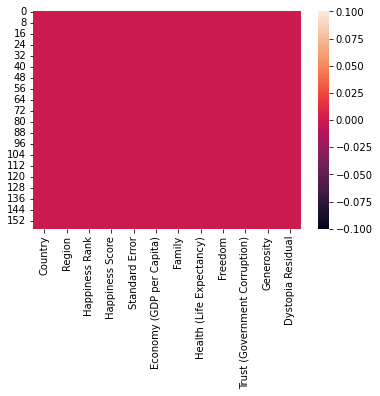

In [7]:
sns.heatmap(world_happiness.isnull())

# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

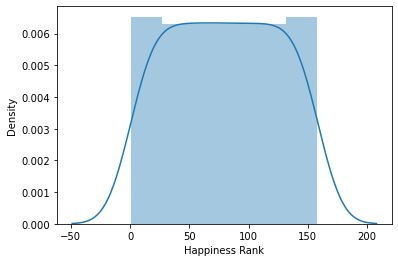

In [8]:
sns.distplot(world_happiness['Happiness Rank'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

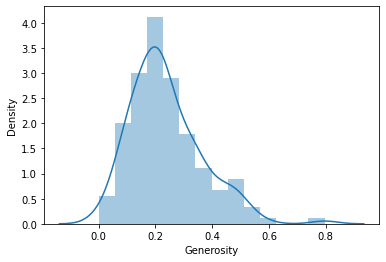

In [9]:
sns.distplot(world_happiness['Generosity'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

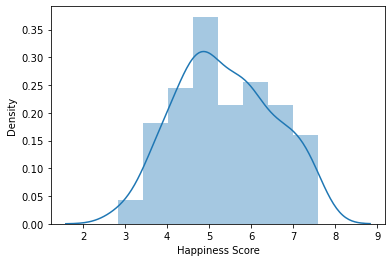

In [10]:
sns.distplot(world_happiness['Happiness Score'])

We can see happiness score 5 is most frequent and 2,3 are very less frequent.

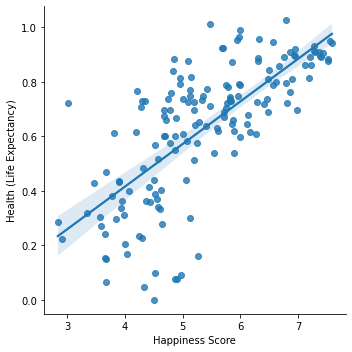

In [11]:
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=world_happiness)

This shows people with good health are happy.

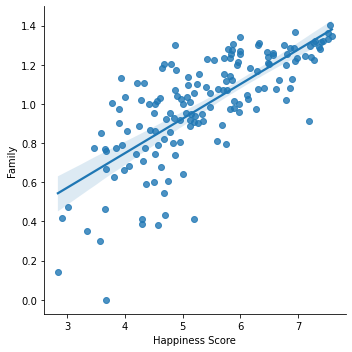

In [12]:
sns.lmplot(x='Happiness Score',y='Family',data=world_happiness)

This shows happiness score increases with family

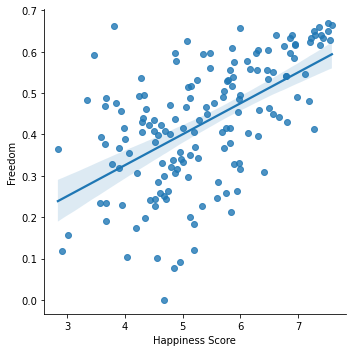

In [13]:
sns.lmplot(x='Happiness Score',y='Freedom',data=world_happiness)

This shows happiness score increases with freedom

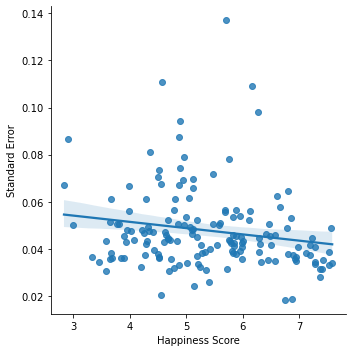

In [14]:
sns.lmplot(x='Happiness Score',y='Standard Error',data=world_happiness)

In [15]:
world_happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

This shows happiness score increases when standard error decreases

In [16]:
from sklearn.preprocessing import OrdinalEncoder
 
# Creating a instance of Ordinal Encoder.
enc = OrdinalEncoder()

for i in world_happiness.columns:
    if world_happiness[i].dtypes=="object":
        world_happiness[i]=enc.fit_transform(world_happiness[i].values.reshape(-1,1))

world_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Country                             AxesSubplot(0.125,0.657941;0.168478x0.222059)
Region                           AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Happiness Rank                   AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Happiness Score                  AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Standard Error                      AxesSubplot(0.125,0.391471;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Family                           AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Health (Life Expectancy)         AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Freedom                                AxesSubplot(0.125,0.125;0.168478x0.222059)
Trust (Government Corruption)       AxesSubplot(0.327174,0.125;0.168478x0.222059)
Generosity                          AxesSubplot(0.529348,0.125;0.168478x0.222059)
Dystopia Residual                   AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

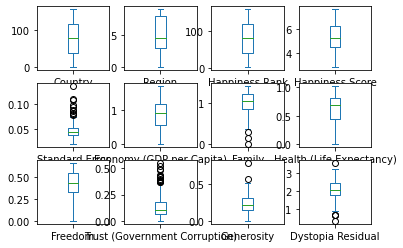

In [17]:

world_happiness.plot(kind='box',subplots=True,layout=(3,4))

We can see there are outliers in data.

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(world_happiness))
threashold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [56]:
z.iloc[157]

Country                          1.370321
Region                           0.965117
Happiness Rank                   1.721277
Happiness Score                  2.222513
Standard Error                   1.134182
Economy (GDP per Capita)         1.586334
Family                           3.134725
Health (Life Expectancy)         1.404129
Freedom                          0.426621
Trust (Government Corruption)    0.301803
Generosity                       0.558153
Dystopia Residual                0.963612
Name: 157, dtype: float64

In [19]:
world_happiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

(array([33., 48., 32., 16.,  4., 10.,  6.,  5.,  2.,  2.]),
 array([0.      , 0.055191, 0.110382, 0.165573, 0.220764, 0.275955,
        0.331146, 0.386337, 0.441528, 0.496719, 0.55191 ]),
 <BarContainer object of 10 artists>)

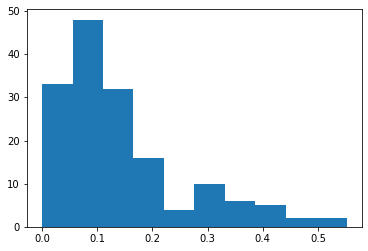

In [20]:
plt.hist(world_happiness['Trust (Government Corruption)'])

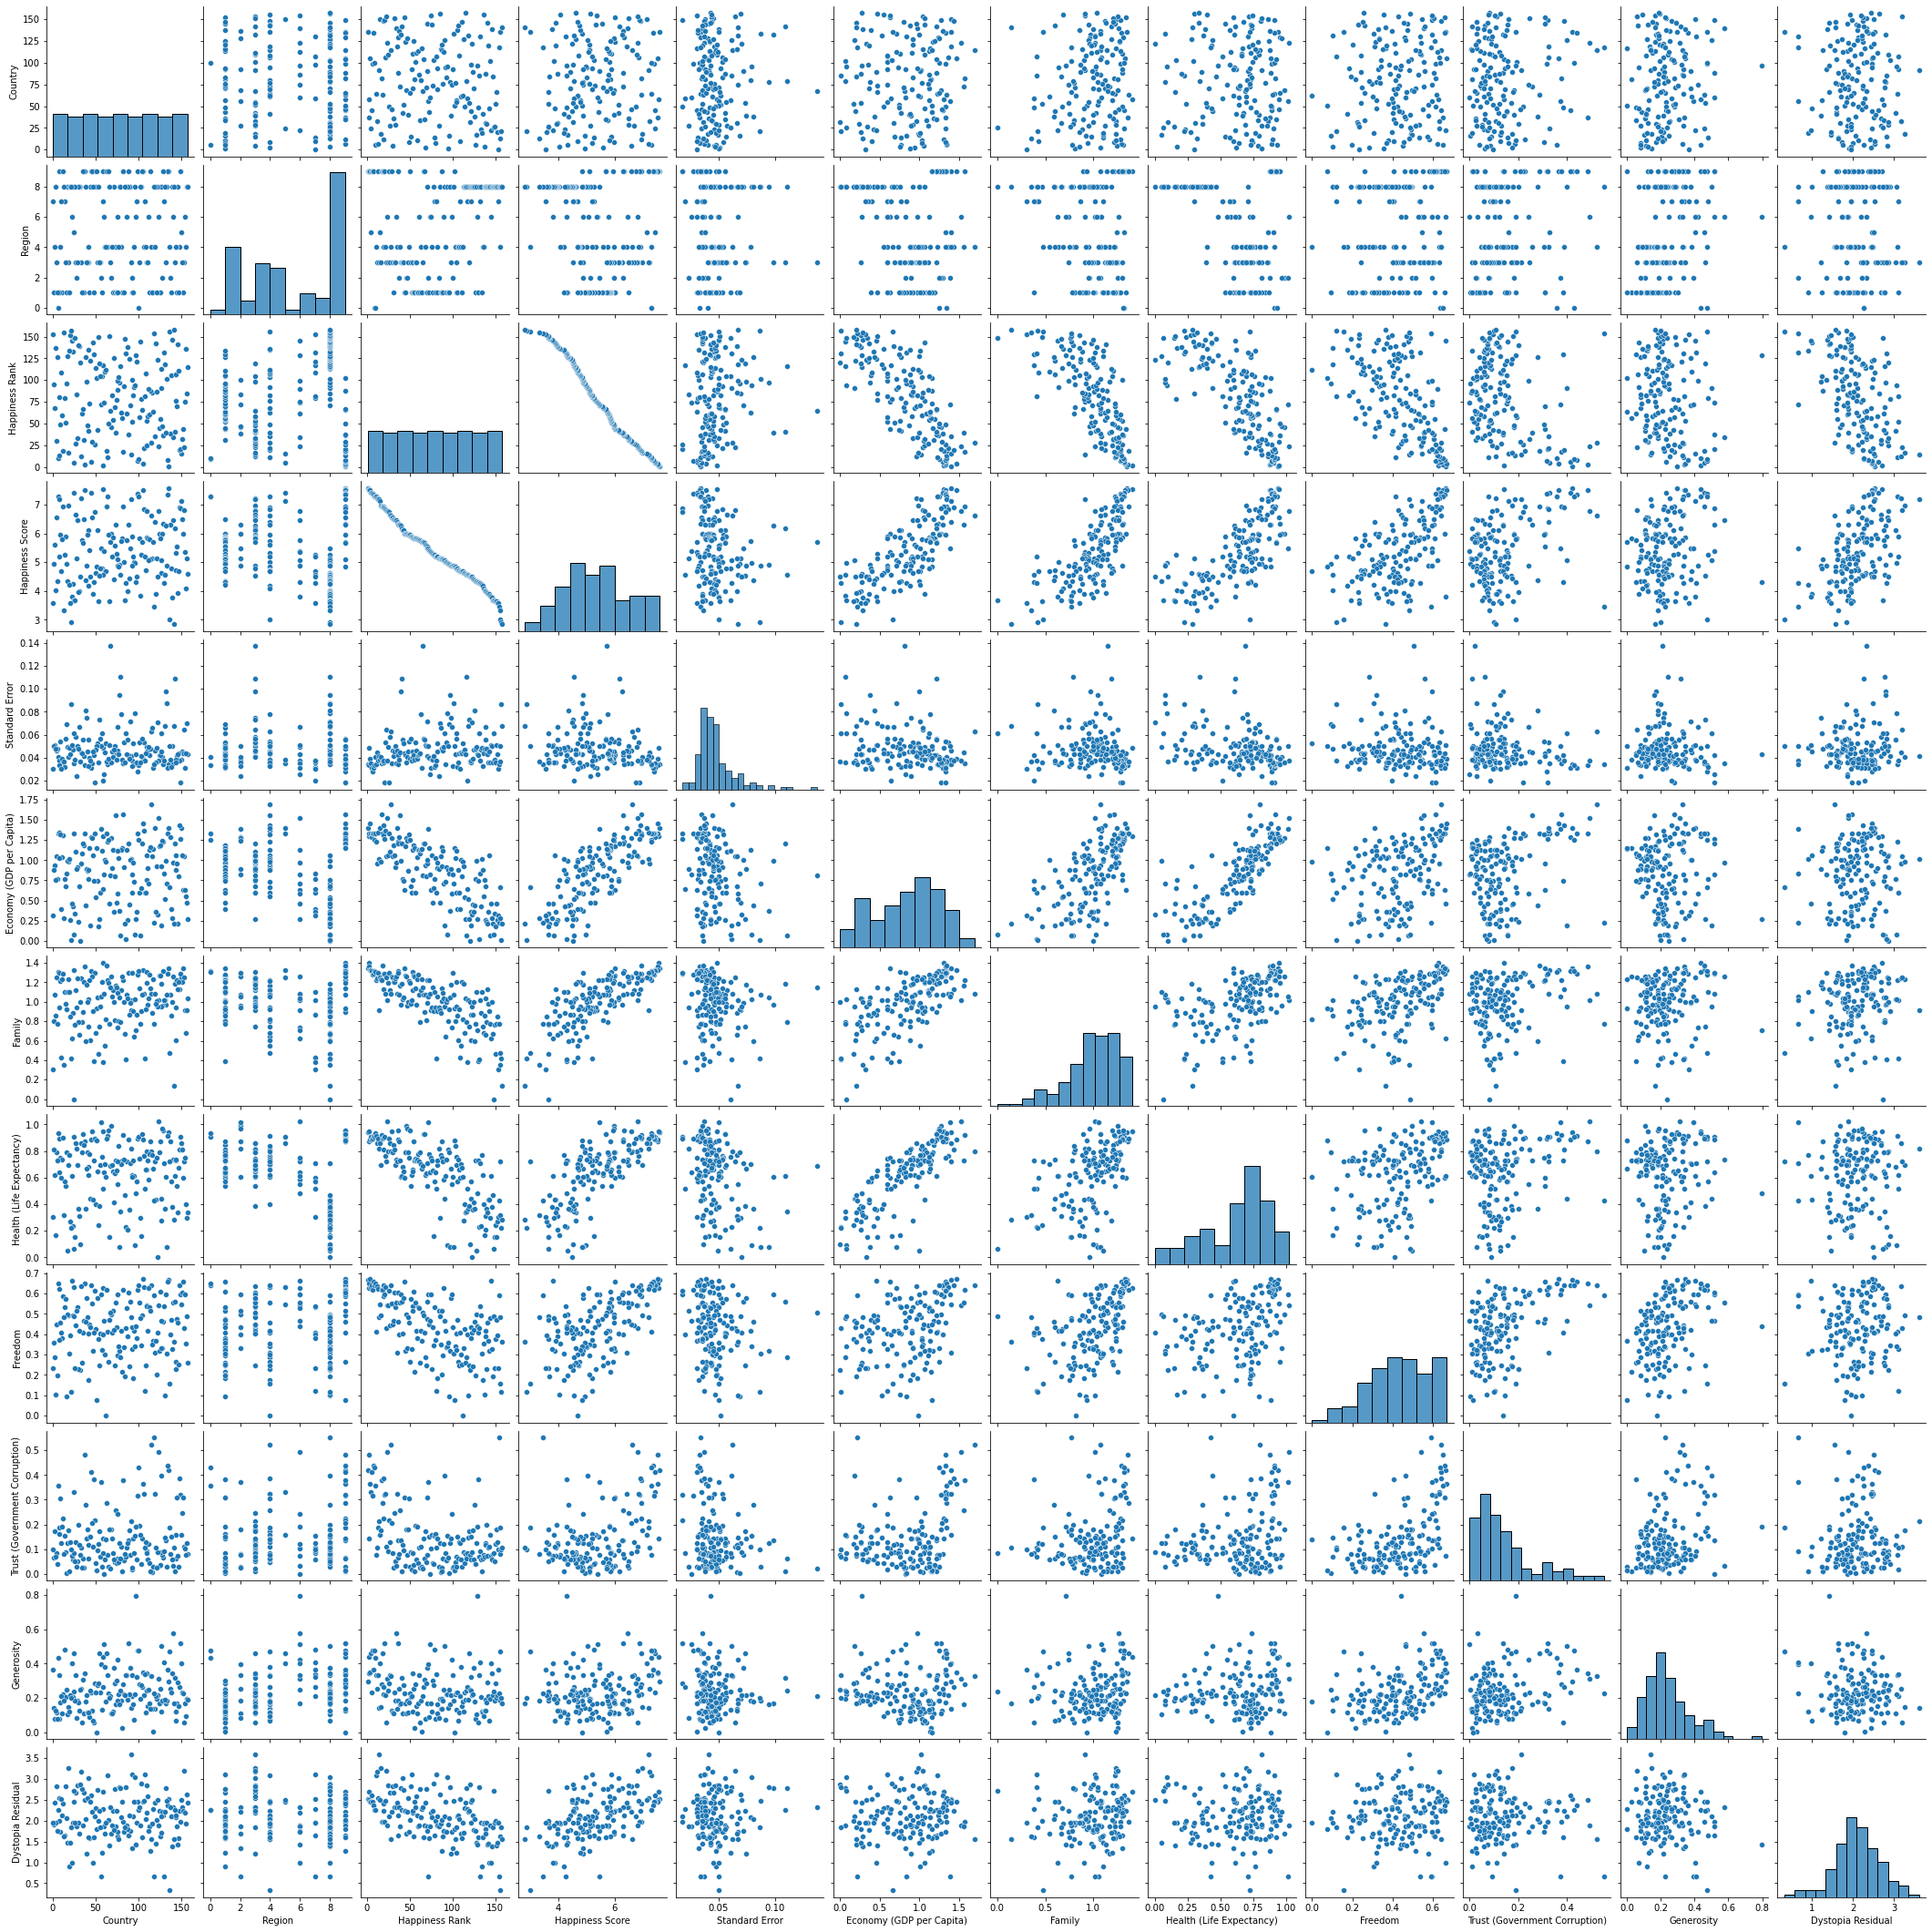

In [21]:
sns.pairplot(world_happiness)

<AxesSubplot:>

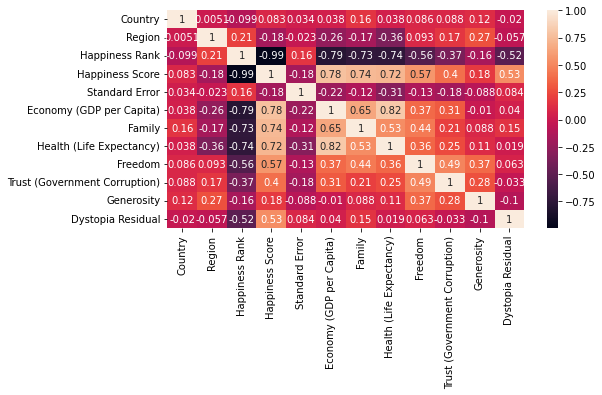

In [22]:
corr=world_happiness.corr()

fig = plt.figure(figsize =(8, 4))
sns.heatmap(corr,annot=True)



In [23]:
world_happiness.corr()['Happiness Score']

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

Since Standard Error is negatively correlated with happiness score and the value is 1.98, we are dropping this freature from the dataset.

In [24]:
world_happiness.drop(['Standard Error'],axis=1,inplace=True)

# Outliers

In [25]:
df=world_happiness[(z<3).all(axis=1)]

In [26]:
print("old dataFrame",world_happiness.shape)
print("new dataFrame",df.shape)
print("total dropped rows",world_happiness.shape[0]-df.shape[0])

old dataFrame (158, 11)
new dataFrame (149, 11)
total dropped rows 9


# Percentage Data Loss:

In [27]:
loss_percent=(158-149)/158*100
print(loss_percent,'%')

5.69620253164557 %


# Splitting the Dataframe:

In [28]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

# Transforming data to remove skewness

In [29]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354, -1.99584442, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966,  1.56626337, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966,  1.60111233, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [30]:
pd.DataFrame(x).skew()

0   -0.267371
1   -0.222589
2   -0.266578
3   -0.140644
4   -0.148528
5   -0.190663
6   -0.076489
7    0.174593
8    0.025172
9    0.014748
dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(df)
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

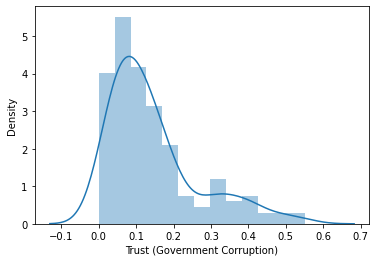

In [32]:
sns.distplot(world_happiness['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

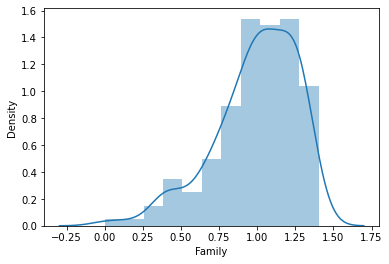

In [33]:
sns.distplot(world_happiness['Family'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

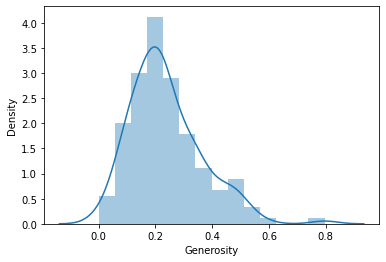

In [34]:
sns.distplot(world_happiness['Generosity'])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [36]:
x_train.shape

(119, 10)

In [37]:
y_train.shape

(119,)

In [38]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_
lm.intercept_
lm.score(x_train,y_train)
pred=lm.predict(x_test)
print('predicted value:',pred)
print('actual value:',y_test)
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))

predicted value: [5.28130142 6.93541826 4.45445907 5.14133263 5.16871875 6.44059803
 5.47232537 3.7786413  5.56085284 5.12701837 4.6026002  7.20009501
 6.3955015  7.33568147 6.91773664 5.77874803 3.87450366 5.46048215
 5.77979143 4.00954063 6.52947126 4.33212713 6.65865205 4.16687441
 4.1710471  3.71182199 4.53851306 4.71544261 5.93551748 6.52896849]
actual value: 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
Name: Happiness Score, dtype: float64
mean squared error 0.0028300861753733585
mean absolute error 0.04209104532519661


In [39]:
lm.score(x_train,y_train)

0.9958337339661993

In [40]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
rg.coef_
rg.score(x_train,y_train)

0.9958337339383704

In [41]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=.001)
ls.fit(x_train,y_train)
ls.coef_
ls.score(x_train,y_train)

0.995793456549809

In [42]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=.001)
en.fit(x_train,y_train)
en.coef_
en.score(x_test,y_test)

0.9975926012755127

In [43]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.9913833318295301

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9984186697861088

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
ab.score(x_train,y_train)

0.9939235510193071

# Model Saving

In [46]:
import pickle
filename='Happiness_Score.pkl'
pickle.dump(lm,open(filename,'wb'))

We can see linear regression is showing better result than other models, so we are saving this model in pickle.